In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.6 MB/s eta 0:00:00


In [ ]:
!pip install torch torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 19.8 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re
import emoji
import string
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import TweetTokenizer
from scipy.sparse import csr_matrix
tk = TweetTokenizer()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
lemmatizer = WordNetLemmatizer()
tk = TweetTokenizer()

In [ ]:
stopwords = ["i", "am", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
        "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
        "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that",
        "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had",
        "having", "do", "does", "did", "doing", "a", "an", "the", "and", "if", "or", "because", "as",
        "until", "while", "of", "at", "by", "for", "with", "about", "between", "into", "through",
        "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off",
        "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all",
        "any", "both", "each", "other", "such", "own", "same", "so", "than", "s", "t", "can", "will", "just", "now"]

punctuations = ["+", ",", ".", "-", "\\", "&", "!", "?", ":", ";", "#", "~", "=", "/", "$", "£", "^", "(", ")", "_", "<", ">"]

In [ ]:
dict_smileys = {
        ":-)":"smiley", ":-]":"smiley", ":-3":"smiley", ":->":"smiley", "8-)":"smiley", ":-}":"smiley", ":)":"smiley", ":]":"smiley",
        ":3":"smiley", ":>":"smiley", "8)":"smiley", ":}":"smiley", ":o)":"smiley", ":c)":"smiley", ":^)":"smiley", "=]":"smiley",
        "=)":"smiley", ":-))":"smiley", ":‑D":"smiley", "8‑D":"smiley","x‑D":"smiley","X‑D":"smiley",":D":"smiley", "8D":"smiley","xD":"smiley",
        "XD":"smiley", ":‑(":"sad", ":‑c":"sad",":‑<":"sad",":‑[":"sad",":(":"sad",":c":"sad",":<":"sad",":[":"sad", ":-||":"sad", ">:[":"sad",
        ":{":"sad", ":@":"sad", ">:(":"sad", ":'‑(":"sad", ":'(":"sad", ":‑P":"playful", "X‑P":"playful", "x‑p":"playful", ":‑p":"playful",
        ":‑Þ":"playful", ":‑þ":"playful", ":‑b":"playful", ":P":"playful", "XP":"playful", "xp":"playful",":p":"playful",":Þ":"playful",
        ":þ":"playful", ":b":"playful", "<3":"love"
        }


dict_contractions = {
        "ain't":"is not", "amn't":"am not", "aren't":"are not", "can't":"cannot", "'cause":"because", "couldn't":"could not","couldn't've":"could not have",
        "could've":"could have","daren't":"dare not","daresn't":"dare not","dasn't":"dare not","didn't":"did not","doesn't":"does not","don't":"do not",
        "e'er":"ever","em":"them","everyone's":"everyone is","finna":"fixing to","gimme":"give me","gonna":"going to","gon't":"go not","gotta":"got to",
        "hadn't":"had not","hasn't":"has not","haven't":"have not","he'd":"he would","he'll":"he will","he's":"he is","he've":"he have",
        "how'd":"how would","how'll":"how will", "how're":"how are", "how's":"how is", "I'd":"I would", "I'll":"I will",
        "I'm":"I am","I'm'a":"I am about to","I'm'o":"I am going to","isn't":"is not",
        "it'd":"it would","it'll":"it will","it's":"it is","I've":"I have","kinda":"kind of","let's":"let us","mayn't":"may not",
        "may've":"may have","mightn't":"might not","might've":"might have","mustn't":"must not", "mustn't've":"must not have", "must've":"must have",
        "needn't":"need not","ne'er":"never", "o'":"of", "o'er":"over", "ol'":"old", "oughtn't":"ought not", "shalln't":"shall not", "shan't":"shall not",
        "she'd":"she would","she'll":"she will","she's":"she is","shouldn't":"should not","shouldn't've":"should not have","should've":"should have",
        "somebody's":"somebody is", "someone's":"someone is", "something's":"something is", "that'd":"that would", "that'll":"that will", "that're":"that are",
        "that's":"that is","there'd":"there would","there'll":"there will","there're":"there are","there's":"there is","these're":"these are",
        "they'd":"they would","they'll":"they will","they're":"they are","they've":"they have","this's":"this is","those're":"those are", "'tis":"it is",
        "'twas":"it was", "wanna":"want to", "wasn't":"was not", "we'd":"we would", "we'd've":"we would have", "we'll":"we will", "we're":"we are",
        "weren't":"were not",
        "we've":"we have","what'd":"what did","what'll":"what will","what're":"what are","what's":"what is","what've":"what have","when's":"when is",
        "where'd":"where did","where're":"where are","where's":"where is","where've":"where have","which's":"which is","who'd":"who would",
        "who'd've":"who would have","who'll":"who will","who're":"who are","who's":"who is","who've":"who have","why'd":"why did","why're":"why are",
        "why's":"why is","won't":"will not","wouldn't":"would not","would've":"would have","y'all":"you all","you'd":"you would",
        "you'll":"you will", "you're":"you are","you've":"you have","Whatcha":"What are you","luv":"love","sux":"sucks"
        }

In [ ]:
def tweet_preprocess(tweet):
    tweet = emoji.demojize(tweet)
    tweet = tweet.lower()   #Converting to Lowercase
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet)  #Removing URLs
    tweet = re.sub(r'^RT[\s]+', '', tweet)   #Removing re-tweet text
    tweet = re.sub(r'\b\w\b', '', tweet) #Removing Single Letters
    tweet = re.sub(r'[\@\#]', '', tweet)  #Removing Hastags and targets (@)
    tweet = re.sub(r'\d+', '', tweet)  #Removing Numbers
    tweet = re.sub(r'\s+', ' ', tweet).strip()  # Removing extra spaces
    for smiley, meaning in dict_smileys.items(): #Emoticons
        tweet = tweet.replace(smiley, meaning)
    for contraction, expanded in dict_contractions.items():  #Contractions
        tweet = tweet.replace(contraction, expanded)
    tweet = tk.tokenize(tweet)  #Tokenizing the tweet
    pos_tags = pos_tag(tweet)
    tweet = [word for word in tweet if word not in stopwords and word not in punctuations]  #Removing Stop words and Punctuations
    final_tweet=[]
    for token,tag in pos_tag(tweet):   #Lemmatizing the tweet
        if token.isdigit():
            continue

        pos=tag[0].lower()
        if pos not in ['a', 'r', 'n', 'v']:
            pos='n'
        final_tweet.append(lemmatizer.lemmatize(token,pos))

    return final_tweet

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/tweet_data.csv')
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
dev_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [ ]:
# Map sentiment labels
def map_sentiments(sentiments):
    sentiment_mapping = {-1: 0, 0: 1, 1: 2}
    return sentiments.map(sentiment_mapping)

In [ ]:
def reverse_map_sentiments(predictions):
    reverse_mapping = {0: -1, 1: 0, 2: 1}
    return predictions.map(reverse_mapping)

In [ ]:
train_df['Text'] = train_df['Text'].apply(tweet_preprocess)
train_df['Text'] = train_df['Text'].apply(lambda x: ' '.join(x))
test_df['Text'] = test_df['Text'].apply(tweet_preprocess)
test_df['Text'] = test_df['Text'].apply(lambda x: ' '.join(x))
dev_df['Text'] = dev_df['Text'].apply(tweet_preprocess)
dev_df['Text'] = dev_df['Text'].apply(lambda x: ' '.join(x))

In [ ]:
# Check for None values
print("None values in train set:", train_df['Sentiment'].isnull().sum())
print("None values in test set:", test_df['Sentiment'].isnull().sum())
print("None values in test set:", dev_df['Sentiment'].isnull().sum())

# Remove rows with None values (if any)
train_df = train_df.dropna(subset=['Sentiment'])
test_df = test_df.dropna(subset=['Sentiment'])
dev_df = test_df.dropna(subset=['Sentiment'])

# Reset index after dropping rows
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
dev_df = test_df.reset_index(drop=True)

None values in train set: 4
None values in test set: 0
None values in test set: 0


In [ ]:
X_train = train_df['Text']
y_train = map_sentiments(train_df['Sentiment'])
X_test = test_df['Text']
y_test = map_sentiments(test_df['Sentiment'])
X_dev = dev_df['Text']
y_dev = map_sentiments(dev_df['Sentiment'])

In [ ]:
# Ensure labels are Pandas Series
y_train = pd.Series(y_train)
y_dev = pd.Series(y_dev)
y_test = pd.Series(y_test)

In [ ]:
# Function to load GloVe embeddings
def load_glove_embeddings(glove_file):
    embeddings_index = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

In [ ]:
# Loading GloVe embeddings
glove_file = '/content/gdrive/MyDrive/glove.twitter.27B.200d.txt'
embeddings_index = load_glove_embeddings(glove_file)

In [ ]:
# Function to convert text to GloVe embeddings
def text_to_glove(texts, embeddings_index, embedding_dim=200):
    embeddings = []
    for text in texts:
        words = text.split()
        word_embeddings = [embeddings_index.get(word, np.zeros(embedding_dim)) for word in words]
        if word_embeddings:
            embeddings.append(np.mean(word_embeddings, axis=0))
        else:
            embeddings.append(np.zeros(embedding_dim))
    return np.array(embeddings)

In [ ]:
# Converting text data to GloVe embeddings
embedding_dim = 200
X_train_glove = text_to_glove(X_train, embeddings_index, embedding_dim)
X_dev_glove = text_to_glove(X_dev, embeddings_index, embedding_dim)
X_test_glove = text_to_glove(X_test, embeddings_index, embedding_dim)

In [ ]:
assert X_train_glove.shape[0] == len(X_train)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
print(f'Min label: {y_train.min()}, Max label: {y_train.max()}')


Min label: 0, Max label: 2


In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, dropout_rate=0.5):
        super(MLP, self).__init__()
        layers = []
        layer_sizes = [input_size] + hidden_sizes
        for i in range(len(layer_sizes) - 1):
            layers.append(nn.Linear(layer_sizes[i], layer_sizes[i + 1]))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))  # Adding Dropout layer
        layers.append(nn.Linear(layer_sizes[-1], output_size))
        layers.append(nn.Softmax(dim=1))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)


[I 2024-08-20 04:02:25,032] A new study created in memory with name: no-name-6f6e8757-c78d-4a82-a452-4c21bcbd5d86


Epoch 1, Training Loss: 1.105629801750183, Validation Loss: 1.103918194770813, Acc on dev: 0.16923076923076924
Epoch 51, Training Loss: 1.0928577184677124, Validation Loss: 1.0920058488845825, Acc on dev: 0.45054945054945056
Epoch 101, Training Loss: 1.0783709287643433, Validation Loss: 1.0783782005310059, Acc on dev: 0.6285714285714286


[I 2024-08-20 04:02:25,638] Trial 0 finished with value: 0.676923076923077 and parameters: {'hidden_size1': 399, 'hidden_size2': 387, 'lr': 1.752164158238249e-05, 'num_epochs': 398, 'patience': 28, 'dropout_rate': 0.20688929371662718, 'weight_decay': 4.136046624452431e-05}. Best is trial 0 with value: 0.676923076923077.
[I 2024-08-20 04:02:25,759] Trial 1 finished with value: 0.45054945054945056 and parameters: {'hidden_size1': 163, 'hidden_size2': 244, 'lr': 4.909042867835316e-05, 'num_epochs': 409, 'patience': 42, 'dropout_rate': 0.39927605150447854, 'weight_decay': 0.002141531152282012}. Best is trial 0 with value: 0.676923076923077.


Epoch 151, Training Loss: 1.058980107307434, Validation Loss: 1.0600425004959106, Acc on dev: 0.6725274725274726
Early stopping at epoch 163
Epoch 1, Training Loss: 1.101109504699707, Validation Loss: 1.099779486656189, Acc on dev: 0.421978021978022
Early stopping at epoch 50
Epoch 1, Training Loss: 1.0956599712371826, Validation Loss: 1.0948210954666138, Acc on dev: 0.3912087912087912


[I 2024-08-20 04:02:25,954] Trial 2 finished with value: 0.7120879120879121 and parameters: {'hidden_size1': 218, 'hidden_size2': 180, 'lr': 0.0002580705738087299, 'num_epochs': 336, 'patience': 25, 'dropout_rate': 0.13893211186283524, 'weight_decay': 0.00010873470382173134}. Best is trial 2 with value: 0.7120879120879121.


Epoch 51, Training Loss: 0.9412992596626282, Validation Loss: 0.9534778594970703, Acc on dev: 0.701098901098901
Early stopping at epoch 84
Epoch 1, Training Loss: 1.0996382236480713, Validation Loss: 1.0984731912612915, Acc on dev: 0.4461538461538462
Epoch 51, Training Loss: 1.0759308338165283, Validation Loss: 1.0768778324127197, Acc on dev: 0.654945054945055


[I 2024-08-20 04:02:26,230] Trial 3 finished with value: 0.701098901098901 and parameters: {'hidden_size1': 354, 'hidden_size2': 142, 'lr': 5.3736204338482667e-05, 'num_epochs': 900, 'patience': 91, 'dropout_rate': 0.19568632764117666, 'weight_decay': 3.402051910778692e-05}. Best is trial 2 with value: 0.7120879120879121.


Epoch 101, Training Loss: 1.0233886241912842, Validation Loss: 1.0296986103057861, Acc on dev: 0.6725274725274726
Early stopping at epoch 122
Epoch 1, Training Loss: 1.0969206094741821, Validation Loss: 1.0924981832504272, Acc on dev: 0.578021978021978
Epoch 51, Training Loss: 0.8096283078193665, Validation Loss: 0.8393988013267517, Acc on dev: 0.7142857142857143


[I 2024-08-20 04:02:26,555] Trial 4 finished with value: 0.7186813186813187 and parameters: {'hidden_size1': 319, 'hidden_size2': 501, 'lr': 0.00035632911206553297, 'num_epochs': 110, 'patience': 65, 'dropout_rate': 0.2878935372947181, 'weight_decay': 1.6170098984823026e-05}. Best is trial 4 with value: 0.7186813186813187.


Epoch 101, Training Loss: 0.7850362658500671, Validation Loss: 0.8330454230308533, Acc on dev: 0.7120879120879121
Epoch 1, Training Loss: 1.1057432889938354, Validation Loss: 1.1029644012451172, Acc on dev: 0.16923076923076924
Epoch 51, Training Loss: 0.8287573456764221, Validation Loss: 0.8548962473869324, Acc on dev: 0.7142857142857143


[I 2024-08-20 04:02:26,892] Trial 5 finished with value: 0.7142857142857143 and parameters: {'hidden_size1': 269, 'hidden_size2': 99, 'lr': 0.0005309678868348373, 'num_epochs': 985, 'patience': 98, 'dropout_rate': 0.2676073838845082, 'weight_decay': 0.0002751551596838202}. Best is trial 4 with value: 0.7186813186813187.


Epoch 101, Training Loss: 0.7918664216995239, Validation Loss: 0.8361061215400696, Acc on dev: 0.7076923076923077
Early stopping at epoch 149
Epoch 1, Training Loss: 1.0939055681228638, Validation Loss: 1.0792170763015747, Acc on dev: 0.3802197802197802


[I 2024-08-20 04:02:27,006] Trial 6 finished with value: 0.7164835164835165 and parameters: {'hidden_size1': 247, 'hidden_size2': 289, 'lr': 0.0029588474368529927, 'num_epochs': 56, 'patience': 27, 'dropout_rate': 0.3744948665455665, 'weight_decay': 0.003574419236496501}. Best is trial 4 with value: 0.7186813186813187.


Early stopping at epoch 46
Epoch 1, Training Loss: 1.1005455255508423, Validation Loss: 1.0971299409866333, Acc on dev: 0.45054945054945056
Epoch 51, Training Loss: 0.8756722807884216, Validation Loss: 0.8951425552368164, Acc on dev: 0.7032967032967034


[I 2024-08-20 04:02:27,232] Trial 7 finished with value: 0.7164835164835165 and parameters: {'hidden_size1': 319, 'hidden_size2': 297, 'lr': 0.0002786513064940369, 'num_epochs': 331, 'patience': 21, 'dropout_rate': 0.20078070874068632, 'weight_decay': 0.0011545117406367668}. Best is trial 4 with value: 0.7186813186813187.


Early stopping at epoch 88
Epoch 1, Training Loss: 1.1006546020507812, Validation Loss: 1.0997016429901123, Acc on dev: 0.2879120879120879
Epoch 51, Training Loss: 1.0985132455825806, Validation Loss: 1.0974843502044678, Acc on dev: 0.45054945054945056


[I 2024-08-20 04:02:27,564] Trial 8 finished with value: 0.45274725274725275 and parameters: {'hidden_size1': 115, 'hidden_size2': 328, 'lr': 1.105900343706079e-05, 'num_epochs': 605, 'patience': 93, 'dropout_rate': 0.3116109439566932, 'weight_decay': 0.005661252280364905}. Best is trial 4 with value: 0.7186813186813187.


Epoch 101, Training Loss: 1.0961525440216064, Validation Loss: 1.0953632593154907, Acc on dev: 0.45054945054945056
Early stopping at epoch 143
Epoch 1, Training Loss: 1.0998964309692383, Validation Loss: 1.0991005897521973, Acc on dev: 0.2879120879120879
Epoch 51, Training Loss: 1.0864962339401245, Validation Loss: 1.0870062112808228, Acc on dev: 0.6417582417582418
Epoch 101, Training Loss: 1.0682170391082764, Validation Loss: 1.0706720352172852, Acc on dev: 0.6527472527472528


[I 2024-08-20 04:02:27,953] Trial 9 finished with value: 0.6703296703296703 and parameters: {'hidden_size1': 130, 'hidden_size2': 491, 'lr': 3.799435514269206e-05, 'num_epochs': 382, 'patience': 98, 'dropout_rate': 0.2269175096115692, 'weight_decay': 0.0003725828264099465}. Best is trial 4 with value: 0.7186813186813187.


Epoch 151, Training Loss: 1.0392625331878662, Validation Loss: 1.0444273948669434, Acc on dev: 0.6681318681318681
Early stopping at epoch 156
Epoch 1, Training Loss: 1.098882794380188, Validation Loss: 1.0239437818527222, Acc on dev: 0.5758241758241758


[I 2024-08-20 04:02:28,258] Trial 10 finished with value: 0.7450549450549451 and parameters: {'hidden_size1': 490, 'hidden_size2': 501, 'lr': 0.00822664411259092, 'num_epochs': 79, 'patience': 68, 'dropout_rate': 0.4942482610894918, 'weight_decay': 1.2656573186222629e-05}. Best is trial 10 with value: 0.7450549450549451.
[I 2024-08-20 04:02:28,356] Trial 11 finished with value: 0.7142857142857143 and parameters: {'hidden_size1': 503, 'hidden_size2': 509, 'lr': 0.009774456229810803, 'num_epochs': 17, 'patience': 68, 'dropout_rate': 0.4956418541708145, 'weight_decay': 1.0422899026082191e-05}. Best is trial 10 with value: 0.7450549450549451.


Epoch 51, Training Loss: 0.7576951384544373, Validation Loss: 0.8182057738304138, Acc on dev: 0.7230769230769231
Epoch 1, Training Loss: 1.1021275520324707, Validation Loss: 1.0187060832977295, Acc on dev: 0.5054945054945055
Epoch 1, Training Loss: 1.099053144454956, Validation Loss: 1.0758392810821533, Acc on dev: 0.567032967032967
Epoch 51, Training Loss: 0.7828644514083862, Validation Loss: 0.8345673084259033, Acc on dev: 0.7120879120879121


[I 2024-08-20 04:02:28,933] Trial 12 finished with value: 0.7406593406593407 and parameters: {'hidden_size1': 494, 'hidden_size2': 417, 'lr': 0.001849164833004784, 'num_epochs': 158, 'patience': 68, 'dropout_rate': 0.4859675475744962, 'weight_decay': 1.0350848772453716e-05}. Best is trial 10 with value: 0.7450549450549451.


Epoch 101, Training Loss: 0.758414089679718, Validation Loss: 0.8351181149482727, Acc on dev: 0.7076923076923077
Epoch 151, Training Loss: 0.6930410265922546, Validation Loss: 0.8100441098213196, Acc on dev: 0.7230769230769231
Epoch 1, Training Loss: 1.1022098064422607, Validation Loss: 1.071928858757019, Acc on dev: 0.389010989010989
Epoch 51, Training Loss: 0.7772876024246216, Validation Loss: 0.8356610536575317, Acc on dev: 0.7186813186813187
Epoch 101, Training Loss: 0.7544127106666565, Validation Loss: 0.8227356672286987, Acc on dev: 0.7164835164835165
Epoch 151, Training Loss: 0.6824570298194885, Validation Loss: 0.8017100095748901, Acc on dev: 0.7472527472527473


[I 2024-08-20 04:02:29,746] Trial 13 finished with value: 0.756043956043956 and parameters: {'hidden_size1': 505, 'hidden_size2': 410, 'lr': 0.00270360095246664, 'num_epochs': 229, 'patience': 68, 'dropout_rate': 0.4844829162274792, 'weight_decay': 4.184570068179867e-05}. Best is trial 13 with value: 0.756043956043956.


Epoch 201, Training Loss: 0.65904301404953, Validation Loss: 0.8010590672492981, Acc on dev: 0.7472527472527473
Epoch 1, Training Loss: 1.097309947013855, Validation Loss: 1.0437511205673218, Acc on dev: 0.3802197802197802
Epoch 51, Training Loss: 0.7743846774101257, Validation Loss: 0.836617112159729, Acc on dev: 0.7098901098901099
Epoch 101, Training Loss: 0.692541241645813, Validation Loss: 0.805383026599884, Acc on dev: 0.7494505494505495


[I 2024-08-20 04:02:30,187] Trial 14 finished with value: 0.7494505494505495 and parameters: {'hidden_size1': 431, 'hidden_size2': 420, 'lr': 0.007253582989433037, 'num_epochs': 215, 'patience': 50, 'dropout_rate': 0.41789070568054465, 'weight_decay': 5.873180711389776e-05}. Best is trial 13 with value: 0.756043956043956.


Early stopping at epoch 126
Epoch 1, Training Loss: 1.0958564281463623, Validation Loss: 1.0698955059051514, Acc on dev: 0.6945054945054945


[I 2024-08-20 04:02:30,407] Trial 15 finished with value: 0.7164835164835165 and parameters: {'hidden_size1': 420, 'hidden_size2': 407, 'lr': 0.0025289498585716746, 'num_epochs': 227, 'patience': 47, 'dropout_rate': 0.42333493432208186, 'weight_decay': 8.369718553590734e-05}. Best is trial 13 with value: 0.756043956043956.


Epoch 51, Training Loss: 0.7789431810379028, Validation Loss: 0.8355156779289246, Acc on dev: 0.7142857142857143
Early stopping at epoch 56
Epoch 1, Training Loss: 1.099474549293518, Validation Loss: 1.0892122983932495, Acc on dev: 0.3802197802197802
Epoch 51, Training Loss: 0.7877088785171509, Validation Loss: 0.8363440036773682, Acc on dev: 0.7120879120879121
Epoch 101, Training Loss: 0.7721731066703796, Validation Loss: 0.8316259384155273, Acc on dev: 0.7142857142857143
Epoch 151, Training Loss: 0.7363845705986023, Validation Loss: 0.8054397702217102, Acc on dev: 0.7318681318681318
Epoch 201, Training Loss: 0.7017009854316711, Validation Loss: 0.811621904373169, Acc on dev: 0.7230769230769231


[I 2024-08-20 04:02:31,189] Trial 16 finished with value: 0.7384615384615385 and parameters: {'hidden_size1': 430, 'hidden_size2': 354, 'lr': 0.000982880835565846, 'num_epochs': 573, 'patience': 80, 'dropout_rate': 0.43690216620412026, 'weight_decay': 0.00017542921394395503}. Best is trial 13 with value: 0.756043956043956.


Early stopping at epoch 242
Epoch 1, Training Loss: 1.1014693975448608, Validation Loss: 1.057166576385498, Acc on dev: 0.5516483516483517


[I 2024-08-20 04:02:31,487] Trial 17 finished with value: 0.7164835164835165 and parameters: {'hidden_size1': 441, 'hidden_size2': 446, 'lr': 0.004279215194823288, 'num_epochs': 226, 'patience': 54, 'dropout_rate': 0.34738136376943207, 'weight_decay': 4.266637232406756e-05}. Best is trial 13 with value: 0.756043956043956.


Epoch 51, Training Loss: 0.7735099196434021, Validation Loss: 0.8357911109924316, Acc on dev: 0.7120879120879121
Early stopping at epoch 65
Epoch 1, Training Loss: 1.1004656553268433, Validation Loss: 1.0873684883117676, Acc on dev: 0.45054945054945056


[I 2024-08-20 04:02:31,760] Trial 18 finished with value: 0.7142857142857143 and parameters: {'hidden_size1': 369, 'hidden_size2': 443, 'lr': 0.0011773552413360266, 'num_epochs': 691, 'patience': 41, 'dropout_rate': 0.4462307283351109, 'weight_decay': 0.0005733919316118028}. Best is trial 13 with value: 0.756043956043956.
[I 2024-08-20 04:02:31,910] Trial 19 finished with value: 0.7164835164835165 and parameters: {'hidden_size1': 67, 'hidden_size2': 229, 'lr': 0.0041536597097797745, 'num_epochs': 253, 'patience': 11, 'dropout_rate': 0.35247868265170534, 'weight_decay': 7.448155754376667e-05}. Best is trial 13 with value: 0.756043956043956.


Epoch 51, Training Loss: 0.7885918021202087, Validation Loss: 0.8363142609596252, Acc on dev: 0.7098901098901099
Early stopping at epoch 64
Epoch 1, Training Loss: 1.0933020114898682, Validation Loss: 1.0796129703521729, Acc on dev: 0.45054945054945056
Early stopping at epoch 28
Epoch 1, Training Loss: 1.1014302968978882, Validation Loss: 1.0492860078811646, Acc on dev: 0.6593406593406593
Epoch 51, Training Loss: 0.7733680605888367, Validation Loss: 0.8360871076583862, Acc on dev: 0.7120879120879121
Epoch 101, Training Loss: 0.7147158980369568, Validation Loss: 0.8068168759346008, Acc on dev: 0.7362637362637363
Epoch 151, Training Loss: 0.6555352807044983, Validation Loss: 0.8105205297470093, Acc on dev: 0.7296703296703296
Epoch 201, Training Loss: 0.6423228979110718, Validation Loss: 0.8007662296295166, Acc on dev: 0.7450549450549451
Epoch 251, Training Loss: 0.6343632936477661, Validation Loss: 0.7994214296340942, Acc on dev: 0.7406593406593407


[I 2024-08-20 04:02:33,031] Trial 20 finished with value: 0.7582417582417582 and parameters: {'hidden_size1': 459, 'hidden_size2': 358, 'lr': 0.005889052113674187, 'num_epochs': 490, 'patience': 83, 'dropout_rate': 0.4587885609837821, 'weight_decay': 2.5901692337776334e-05}. Best is trial 20 with value: 0.7582417582417582.


Epoch 301, Training Loss: 0.6305980682373047, Validation Loss: 0.7921132445335388, Acc on dev: 0.756043956043956
Early stopping at epoch 327
Epoch 1, Training Loss: 1.094140648841858, Validation Loss: 1.0313977003097534, Acc on dev: 0.6615384615384615
Epoch 51, Training Loss: 0.776597261428833, Validation Loss: 0.8335592746734619, Acc on dev: 0.7208791208791209
Epoch 101, Training Loss: 0.7104509472846985, Validation Loss: 0.8091070652008057, Acc on dev: 0.7274725274725274
Epoch 151, Training Loss: 0.6601752042770386, Validation Loss: 0.8159188032150269, Acc on dev: 0.7274725274725274
Epoch 201, Training Loss: 0.6464704871177673, Validation Loss: 0.801433265209198, Acc on dev: 0.7428571428571429


[I 2024-08-20 04:02:33,848] Trial 21 finished with value: 0.7472527472527473 and parameters: {'hidden_size1': 460, 'hidden_size2': 356, 'lr': 0.005945021959496119, 'num_epochs': 742, 'patience': 83, 'dropout_rate': 0.44212436827690205, 'weight_decay': 2.755852779076264e-05}. Best is trial 20 with value: 0.7582417582417582.


Early stopping at epoch 223
Epoch 1, Training Loss: 1.1004536151885986, Validation Loss: 1.0793803930282593, Acc on dev: 0.6153846153846154
Epoch 51, Training Loss: 0.7828552722930908, Validation Loss: 0.8345282077789307, Acc on dev: 0.7120879120879121
Epoch 101, Training Loss: 0.7634227275848389, Validation Loss: 0.8360380530357361, Acc on dev: 0.7098901098901099
Epoch 151, Training Loss: 0.7106037735939026, Validation Loss: 0.8027541041374207, Acc on dev: 0.7428571428571429
Epoch 201, Training Loss: 0.6669537425041199, Validation Loss: 0.8051061630249023, Acc on dev: 0.7384615384615385


[I 2024-08-20 04:02:34,739] Trial 22 finished with value: 0.7472527472527473 and parameters: {'hidden_size1': 464, 'hidden_size2': 372, 'lr': 0.0015207617790479453, 'num_epochs': 499, 'patience': 76, 'dropout_rate': 0.4599001939883705, 'weight_decay': 2.2718783897517175e-05}. Best is trial 20 with value: 0.7582417582417582.


Epoch 251, Training Loss: 0.6464914679527283, Validation Loss: 0.8085978627204895, Acc on dev: 0.7318681318681318
Early stopping at epoch 257
Epoch 1, Training Loss: 1.1001662015914917, Validation Loss: 1.0306899547576904, Acc on dev: 0.3802197802197802
Epoch 51, Training Loss: 0.7688929438591003, Validation Loss: 0.8359116911888123, Acc on dev: 0.7032967032967034
Epoch 101, Training Loss: 0.679559051990509, Validation Loss: 0.8065667748451233, Acc on dev: 0.7384615384615385


[I 2024-08-20 04:02:35,200] Trial 23 finished with value: 0.7494505494505495 and parameters: {'hidden_size1': 390, 'hidden_size2': 450, 'lr': 0.009859618438122351, 'num_epochs': 483, 'patience': 58, 'dropout_rate': 0.40020786305979855, 'weight_decay': 5.650920135532627e-05}. Best is trial 20 with value: 0.7582417582417582.


Early stopping at epoch 129
Epoch 1, Training Loss: 1.1003330945968628, Validation Loss: 1.0568902492523193, Acc on dev: 0.5560439560439561
Epoch 51, Training Loss: 0.7777622938156128, Validation Loss: 0.8351351022720337, Acc on dev: 0.7098901098901099
Epoch 101, Training Loss: 0.7128145098686218, Validation Loss: 0.8126320242881775, Acc on dev: 0.7318681318681318


[I 2024-08-20 04:02:35,823] Trial 24 finished with value: 0.7494505494505495 and parameters: {'hidden_size1': 506, 'hidden_size2': 333, 'lr': 0.004474692271796847, 'num_epochs': 189, 'patience': 56, 'dropout_rate': 0.4686561086949459, 'weight_decay': 0.00011616654132857781}. Best is trial 20 with value: 0.7582417582417582.


Epoch 151, Training Loss: 0.6658143997192383, Validation Loss: 0.803292989730835, Acc on dev: 0.7450549450549451
Epoch 1, Training Loss: 1.1005263328552246, Validation Loss: 1.0905942916870117, Acc on dev: 0.5340659340659341
Epoch 51, Training Loss: 0.7908286452293396, Validation Loss: 0.8354760408401489, Acc on dev: 0.7120879120879121
Epoch 101, Training Loss: 0.7702842354774475, Validation Loss: 0.8334119915962219, Acc on dev: 0.7120879120879121


[I 2024-08-20 04:02:36,296] Trial 25 finished with value: 0.7164835164835165 and parameters: {'hidden_size1': 453, 'hidden_size2': 415, 'lr': 0.0007363017590517046, 'num_epochs': 288, 'patience': 76, 'dropout_rate': 0.4108552760249281, 'weight_decay': 2.258149359240328e-05}. Best is trial 20 with value: 0.7582417582417582.


Early stopping at epoch 132
Epoch 1, Training Loss: 1.0984389781951904, Validation Loss: 1.096401333808899, Acc on dev: 0.3912087912087912
Epoch 51, Training Loss: 0.9439849853515625, Validation Loss: 0.9519996047019958, Acc on dev: 0.7076923076923077
Epoch 101, Training Loss: 0.8161543607711792, Validation Loss: 0.8444496393203735, Acc on dev: 0.7120879120879121
Epoch 151, Training Loss: 0.7968471646308899, Validation Loss: 0.8359438180923462, Acc on dev: 0.7142857142857143


[I 2024-08-20 04:02:36,853] Trial 26 finished with value: 0.7164835164835165 and parameters: {'hidden_size1': 344, 'hidden_size2': 464, 'lr': 0.0001543343349834118, 'num_epochs': 717, 'patience': 84, 'dropout_rate': 0.364962646580439, 'weight_decay': 0.00017799736917777323}. Best is trial 20 with value: 0.7582417582417582.


Early stopping at epoch 176
Epoch 1, Training Loss: 1.104838252067566, Validation Loss: 1.0749062299728394, Acc on dev: 0.4857142857142857
Epoch 51, Training Loss: 0.7801505327224731, Validation Loss: 0.8353428840637207, Acc on dev: 0.7098901098901099


[I 2024-08-20 04:02:37,201] Trial 27 finished with value: 0.7230769230769231 and parameters: {'hidden_size1': 396, 'hidden_size2': 323, 'lr': 0.002855527790950792, 'num_epochs': 141, 'patience': 50, 'dropout_rate': 0.4662559949661705, 'weight_decay': 1.9353851024305665e-05}. Best is trial 20 with value: 0.7582417582417582.


Epoch 101, Training Loss: 0.7560933828353882, Validation Loss: 0.825639009475708, Acc on dev: 0.7142857142857143
Early stopping at epoch 108
Epoch 1, Training Loss: 1.0963149070739746, Validation Loss: 1.0476497411727905, Acc on dev: 0.3802197802197802
Epoch 51, Training Loss: 0.7734209299087524, Validation Loss: 0.8377678990364075, Acc on dev: 0.7076923076923077


[I 2024-08-20 04:02:37,642] Trial 28 finished with value: 0.7494505494505495 and parameters: {'hidden_size1': 478, 'hidden_size2': 256, 'lr': 0.005993181967027785, 'num_epochs': 432, 'patience': 63, 'dropout_rate': 0.3180166981176946, 'weight_decay': 4.361384892795568e-05}. Best is trial 20 with value: 0.7582417582417582.


Epoch 101, Training Loss: 0.6995925903320312, Validation Loss: 0.8122503161430359, Acc on dev: 0.7274725274725274
Epoch 151, Training Loss: 0.6587742567062378, Validation Loss: 0.8068251013755798, Acc on dev: 0.7318681318681318
Early stopping at epoch 153
Epoch 1, Training Loss: 1.0981005430221558, Validation Loss: 1.0762418508529663, Acc on dev: 0.4945054945054945


[I 2024-08-20 04:02:37,867] Trial 29 finished with value: 0.7164835164835165 and parameters: {'hidden_size1': 417, 'hidden_size2': 393, 'lr': 0.0020988064299258817, 'num_epochs': 560, 'patience': 34, 'dropout_rate': 0.39183076121984695, 'weight_decay': 5.3966440701895466e-05}. Best is trial 20 with value: 0.7582417582417582.


Epoch 51, Training Loss: 0.7831904888153076, Validation Loss: 0.8378247618675232, Acc on dev: 0.7120879120879121
Early stopping at epoch 58
Epoch 1, Training Loss: 1.0992858409881592, Validation Loss: 1.0969724655151367, Acc on dev: 0.45054945054945056
Epoch 51, Training Loss: 0.9966686367988586, Validation Loss: 1.002577304840088, Acc on dev: 0.6857142857142857
Epoch 101, Training Loss: 0.8369677662849426, Validation Loss: 0.8648836612701416, Acc on dev: 0.7076923076923077


[I 2024-08-20 04:02:38,440] Trial 30 finished with value: 0.7142857142857143 and parameters: {'hidden_size1': 384, 'hidden_size2': 385, 'lr': 0.00011641118791225612, 'num_epochs': 810, 'patience': 74, 'dropout_rate': 0.10761597103366191, 'weight_decay': 0.00016595631207587028}. Best is trial 20 with value: 0.7582417582417582.


Epoch 151, Training Loss: 0.8038159012794495, Validation Loss: 0.840119481086731, Acc on dev: 0.7120879120879121
Early stopping at epoch 184
Epoch 1, Training Loss: 1.0982375144958496, Validation Loss: 1.0343352556228638, Acc on dev: 0.3802197802197802
Epoch 51, Training Loss: 0.7500763535499573, Validation Loss: 0.809130847454071, Acc on dev: 0.7428571428571429
Epoch 101, Training Loss: 0.6889586448669434, Validation Loss: 0.8093365430831909, Acc on dev: 0.734065934065934


[I 2024-08-20 04:02:38,949] Trial 31 finished with value: 0.756043956043956 and parameters: {'hidden_size1': 406, 'hidden_size2': 451, 'lr': 0.008117167450868266, 'num_epochs': 470, 'patience': 60, 'dropout_rate': 0.4097062703368015, 'weight_decay': 5.849982792092754e-05}. Best is trial 20 with value: 0.7582417582417582.


Early stopping at epoch 147
Epoch 1, Training Loss: 1.1005603075027466, Validation Loss: 1.0360896587371826, Acc on dev: 0.6791208791208792
Epoch 51, Training Loss: 0.7742147445678711, Validation Loss: 0.8339647650718689, Acc on dev: 0.7054945054945055
Epoch 101, Training Loss: 0.6925144791603088, Validation Loss: 0.8097929954528809, Acc on dev: 0.734065934065934


[I 2024-08-20 04:02:39,469] Trial 32 finished with value: 0.7472527472527473 and parameters: {'hidden_size1': 414, 'hidden_size2': 467, 'lr': 0.006585991887498436, 'num_epochs': 410, 'patience': 61, 'dropout_rate': 0.42159056948717794, 'weight_decay': 3.085938044608873e-05}. Best is trial 20 with value: 0.7582417582417582.


Early stopping at epoch 147
Epoch 1, Training Loss: 1.0989737510681152, Validation Loss: 1.052467942237854, Acc on dev: 0.6703296703296703


[I 2024-08-20 04:02:39,679] Trial 33 finished with value: 0.7186813186813187 and parameters: {'hidden_size1': 469, 'hidden_size2': 428, 'lr': 0.0038363959094489617, 'num_epochs': 316, 'patience': 45, 'dropout_rate': 0.4725510924105, 'weight_decay': 7.071097967458221e-05}. Best is trial 20 with value: 0.7582417582417582.


Epoch 51, Training Loss: 0.777025043964386, Validation Loss: 0.8360080122947693, Acc on dev: 0.7120879120879121
Early stopping at epoch 51
Epoch 1, Training Loss: 1.0996739864349365, Validation Loss: 1.048730492591858, Acc on dev: 0.3956043956043956
Epoch 51, Training Loss: 0.7758651375770569, Validation Loss: 0.8346300721168518, Acc on dev: 0.7142857142857143
Epoch 101, Training Loss: 0.7025254964828491, Validation Loss: 0.805861234664917, Acc on dev: 0.7362637362637363
Epoch 151, Training Loss: 0.6592236161231995, Validation Loss: 0.8021414875984192, Acc on dev: 0.7384615384615385


[I 2024-08-20 04:02:40,392] Trial 34 finished with value: 0.7472527472527473 and parameters: {'hidden_size1': 442, 'hidden_size2': 373, 'lr': 0.005752724177233724, 'num_epochs': 441, 'patience': 89, 'dropout_rate': 0.3888469175927169, 'weight_decay': 0.00010231253101067531}. Best is trial 20 with value: 0.7582417582417582.


Epoch 201, Training Loss: 0.6380535960197449, Validation Loss: 0.8109056949615479, Acc on dev: 0.7296703296703296
Early stopping at epoch 218
Epoch 1, Training Loss: 1.094515085220337, Validation Loss: 1.0634254217147827, Acc on dev: 0.6857142857142857


[I 2024-08-20 04:02:40,661] Trial 35 finished with value: 0.7186813186813187 and parameters: {'hidden_size1': 333, 'hidden_size2': 476, 'lr': 0.00317695550101427, 'num_epochs': 375, 'patience': 39, 'dropout_rate': 0.33365175433935956, 'weight_decay': 3.873523155054024e-05}. Best is trial 20 with value: 0.7582417582417582.


Epoch 51, Training Loss: 0.7765864133834839, Validation Loss: 0.8347035050392151, Acc on dev: 0.7076923076923077
Early stopping at epoch 77
Epoch 1, Training Loss: 1.1039183139801025, Validation Loss: 1.0850275754928589, Acc on dev: 0.3956043956043956


[I 2024-08-20 04:02:41,035] Trial 36 finished with value: 0.7230769230769231 and parameters: {'hidden_size1': 297, 'hidden_size2': 394, 'lr': 0.001700587028281284, 'num_epochs': 635, 'patience': 52, 'dropout_rate': 0.4422727024862763, 'weight_decay': 1.640768864673738e-05}. Best is trial 20 with value: 0.7582417582417582.


Epoch 51, Training Loss: 0.7829260230064392, Validation Loss: 0.8381684422492981, Acc on dev: 0.7120879120879121
Epoch 101, Training Loss: 0.7657292485237122, Validation Loss: 0.8347530364990234, Acc on dev: 0.7076923076923077
Early stopping at epoch 126
Epoch 1, Training Loss: 1.097179889678955, Validation Loss: 1.0445648431777954, Acc on dev: 0.44175824175824174
Epoch 51, Training Loss: 0.7539286613464355, Validation Loss: 0.8036509156227112, Acc on dev: 0.7450549450549451


[I 2024-08-20 04:02:41,555] Trial 37 finished with value: 0.7494505494505495 and parameters: {'hidden_size1': 373, 'hidden_size2': 425, 'lr': 0.007032641965200221, 'num_epochs': 531, 'patience': 74, 'dropout_rate': 0.26672447884785255, 'weight_decay': 0.0002987280192761417}. Best is trial 20 with value: 0.7582417582417582.


Epoch 101, Training Loss: 0.6968140602111816, Validation Loss: 0.8120275735855103, Acc on dev: 0.7252747252747253
Epoch 151, Training Loss: 0.6684024333953857, Validation Loss: 0.8028748035430908, Acc on dev: 0.7362637362637363
Early stopping at epoch 161


[I 2024-08-20 04:02:41,776] Trial 38 finished with value: 0.7164835164835165 and parameters: {'hidden_size1': 218, 'hidden_size2': 356, 'lr': 0.0007185605609267779, 'num_epochs': 294, 'patience': 34, 'dropout_rate': 0.3766913942311057, 'weight_decay': 0.0008315402219876703}. Best is trial 20 with value: 0.7582417582417582.


Epoch 1, Training Loss: 1.0915499925613403, Validation Loss: 1.0865662097930908, Acc on dev: 0.45494505494505494
Epoch 51, Training Loss: 0.8009807467460632, Validation Loss: 0.8348162174224854, Acc on dev: 0.7098901098901099
Early stopping at epoch 71
Epoch 1, Training Loss: 1.0992226600646973, Validation Loss: 1.0944938659667969, Acc on dev: 0.6263736263736264
Epoch 51, Training Loss: 0.8063293695449829, Validation Loss: 0.8378539085388184, Acc on dev: 0.7098901098901099
Epoch 101, Training Loss: 0.7860090136528015, Validation Loss: 0.83376145362854, Acc on dev: 0.7142857142857143
Epoch 151, Training Loss: 0.7752349972724915, Validation Loss: 0.8323777914047241, Acc on dev: 0.7164835164835165


[I 2024-08-20 04:02:42,385] Trial 39 finished with value: 0.7186813186813187 and parameters: {'hidden_size1': 511, 'hidden_size2': 311, 'lr': 0.00038940207757286985, 'num_epochs': 655, 'patience': 60, 'dropout_rate': 0.4093539449908465, 'weight_decay': 0.0001333123937460219}. Best is trial 20 with value: 0.7582417582417582.


Early stopping at epoch 189
Epoch 1, Training Loss: 1.09833824634552, Validation Loss: 1.0765243768692017, Acc on dev: 0.47692307692307695
Epoch 51, Training Loss: 0.8089839816093445, Validation Loss: 0.842970609664917, Acc on dev: 0.7098901098901099


[I 2024-08-20 04:02:42,662] Trial 40 finished with value: 0.7208791208791209 and parameters: {'hidden_size1': 469, 'hidden_size2': 267, 'lr': 0.005043388733968838, 'num_epochs': 474, 'patience': 70, 'dropout_rate': 0.4993855173978351, 'weight_decay': 0.009536983381018244}. Best is trial 20 with value: 0.7582417582417582.


Early stopping at epoch 83
Epoch 1, Training Loss: 1.0965707302093506, Validation Loss: 1.0303047895431519, Acc on dev: 0.44395604395604393
Epoch 51, Training Loss: 0.7533444166183472, Validation Loss: 0.8083357214927673, Acc on dev: 0.7384615384615385
Epoch 101, Training Loss: 0.693834125995636, Validation Loss: 0.8116651773452759, Acc on dev: 0.7362637362637363


[I 2024-08-20 04:02:43,144] Trial 41 finished with value: 0.7538461538461538 and parameters: {'hidden_size1': 401, 'hidden_size2': 455, 'lr': 0.007967568593193902, 'num_epochs': 496, 'patience': 58, 'dropout_rate': 0.4260567040708443, 'weight_decay': 5.858625746081226e-05}. Best is trial 20 with value: 0.7582417582417582.


Early stopping at epoch 136
Epoch 1, Training Loss: 1.095053791999817, Validation Loss: 1.033143401145935, Acc on dev: 0.3912087912087912
Epoch 51, Training Loss: 0.7485554814338684, Validation Loss: 0.8091089129447937, Acc on dev: 0.7384615384615385
Epoch 101, Training Loss: 0.6884186863899231, Validation Loss: 0.8104185461997986, Acc on dev: 0.7362637362637363


[I 2024-08-20 04:02:43,815] Trial 42 finished with value: 0.7604395604395604 and parameters: {'hidden_size1': 410, 'hidden_size2': 442, 'lr': 0.007877992834018452, 'num_epochs': 357, 'patience': 49, 'dropout_rate': 0.45735184262179296, 'weight_decay': 5.9385065862882424e-05}. Best is trial 42 with value: 0.7604395604395604.


Epoch 151, Training Loss: 0.6620090007781982, Validation Loss: 0.8077298402786255, Acc on dev: 0.7296703296703296
Early stopping at epoch 198
Epoch 1, Training Loss: 1.0992977619171143, Validation Loss: 1.0240979194641113, Acc on dev: 0.5494505494505495
Epoch 51, Training Loss: 0.7500552535057068, Validation Loss: 0.8096665143966675, Acc on dev: 0.734065934065934
Epoch 101, Training Loss: 0.7000258564949036, Validation Loss: 0.8160433769226074, Acc on dev: 0.7252747252747253


[I 2024-08-20 04:02:44,292] Trial 43 finished with value: 0.7494505494505495 and parameters: {'hidden_size1': 359, 'hidden_size2': 488, 'lr': 0.009845155613716768, 'num_epochs': 344, 'patience': 65, 'dropout_rate': 0.4782832965732178, 'weight_decay': 3.506635082334243e-05}. Best is trial 42 with value: 0.7604395604395604.


Early stopping at epoch 143
Epoch 1, Training Loss: 1.1005017757415771, Validation Loss: 1.0635786056518555, Acc on dev: 0.6945054945054945
Epoch 51, Training Loss: 0.7801727652549744, Validation Loss: 0.8308561444282532, Acc on dev: 0.7208791208791209
Epoch 101, Training Loss: 0.7319498062133789, Validation Loss: 0.7972570657730103, Acc on dev: 0.7494505494505495


[I 2024-08-20 04:02:45,021] Trial 44 finished with value: 0.7516483516483516 and parameters: {'hidden_size1': 408, 'hidden_size2': 444, 'lr': 0.003372983275834323, 'num_epochs': 539, 'patience': 56, 'dropout_rate': 0.4566093637124048, 'weight_decay': 9.11473440299387e-05}. Best is trial 42 with value: 0.7604395604395604.


Epoch 151, Training Loss: 0.6748611330986023, Validation Loss: 0.7998086214065552, Acc on dev: 0.7428571428571429
Epoch 201, Training Loss: 0.6487435698509216, Validation Loss: 0.8006390333175659, Acc on dev: 0.7428571428571429
Early stopping at epoch 202
Epoch 1, Training Loss: 1.0913838148117065, Validation Loss: 1.0774421691894531, Acc on dev: 0.4901098901098901
Epoch 51, Training Loss: 0.7831524610519409, Validation Loss: 0.8350670337677002, Acc on dev: 0.7164835164835165
Epoch 101, Training Loss: 0.7612836956977844, Validation Loss: 0.8268975019454956, Acc on dev: 0.701098901098901
Epoch 151, Training Loss: 0.7065296173095703, Validation Loss: 0.8055443167686462, Acc on dev: 0.7384615384615385


[I 2024-08-20 04:02:45,817] Trial 45 finished with value: 0.7472527472527473 and parameters: {'hidden_size1': 301, 'hidden_size2': 183, 'lr': 0.0021409891426708645, 'num_epochs': 463, 'patience': 87, 'dropout_rate': 0.4368225016110471, 'weight_decay': 1.5342811035228075e-05}. Best is trial 42 with value: 0.7604395604395604.


Epoch 201, Training Loss: 0.6723711490631104, Validation Loss: 0.8071528077125549, Acc on dev: 0.7384615384615385
Epoch 251, Training Loss: 0.653038740158081, Validation Loss: 0.8079636096954346, Acc on dev: 0.7318681318681318
Early stopping at epoch 253
Epoch 1, Training Loss: 1.1015756130218506, Validation Loss: 1.1009823083877563, Acc on dev: 0.16923076923076924
Epoch 51, Training Loss: 1.0898749828338623, Validation Loss: 1.0901741981506348, Acc on dev: 0.46153846153846156
Epoch 101, Training Loss: 1.0767409801483154, Validation Loss: 1.0786906480789185, Acc on dev: 0.47912087912087914
Epoch 151, Training Loss: 1.0612778663635254, Validation Loss: 1.0639384984970093, Acc on dev: 0.5362637362637362
Epoch 201, Training Loss: 1.0404304265975952, Validation Loss: 1.0444711446762085, Acc on dev: 0.5758241758241758
Epoch 251, Training Loss: 1.0116891860961914, Validation Loss: 1.017777442932129, Acc on dev: 0.6593406593406593
Epoch 301, Training Loss: 0.9752916693687439, Validation Loss:

[I 2024-08-20 04:02:46,976] Trial 46 finished with value: 0.7120879120879121 and parameters: {'hidden_size1': 256, 'hidden_size2': 467, 'lr': 2.4684859005366556e-05, 'num_epochs': 369, 'patience': 71, 'dropout_rate': 0.4849742083678924, 'weight_decay': 0.001696417916325326}. Best is trial 42 with value: 0.7604395604395604.


Epoch 1, Training Loss: 1.0981712341308594, Validation Loss: 1.0339910984039307, Acc on dev: 0.3868131868131868
Epoch 51, Training Loss: 0.7650928497314453, Validation Loss: 0.8180761337280273, Acc on dev: 0.7362637362637363
Epoch 101, Training Loss: 0.7249096632003784, Validation Loss: 0.8229069113731384, Acc on dev: 0.7186813186813187
Epoch 151, Training Loss: 0.6537084579467773, Validation Loss: 0.8021849393844604, Acc on dev: 0.7450549450549451


[I 2024-08-20 04:02:47,655] Trial 47 finished with value: 0.7516483516483516 and parameters: {'hidden_size1': 486, 'hidden_size2': 511, 'lr': 0.00792593723215171, 'num_epochs': 414, 'patience': 94, 'dropout_rate': 0.1743838382799991, 'weight_decay': 0.00022084234240235545}. Best is trial 42 with value: 0.7604395604395604.


Early stopping at epoch 160
Epoch 1, Training Loss: 1.0983140468597412, Validation Loss: 1.0494848489761353, Acc on dev: 0.5186813186813187


[I 2024-08-20 04:02:47,996] Trial 48 finished with value: 0.7164835164835165 and parameters: {'hidden_size1': 442, 'hidden_size2': 486, 'lr': 0.005021817140971262, 'num_epochs': 996, 'patience': 64, 'dropout_rate': 0.4298175009292822, 'weight_decay': 5.6500777068058606e-05}. Best is trial 42 with value: 0.7604395604395604.


Epoch 51, Training Loss: 0.7725998759269714, Validation Loss: 0.8371537327766418, Acc on dev: 0.7120879120879121
Early stopping at epoch 73
Epoch 1, Training Loss: 1.1089544296264648, Validation Loss: 1.1013503074645996, Acc on dev: 0.16703296703296702


[I 2024-08-20 04:02:48,240] Trial 49 finished with value: 0.7142857142857143 and parameters: {'hidden_size1': 322, 'hidden_size2': 64, 'lr': 0.0013492763356366985, 'num_epochs': 586, 'patience': 46, 'dropout_rate': 0.46413455520645386, 'weight_decay': 2.683998977021212e-05}. Best is trial 42 with value: 0.7604395604395604.


Epoch 51, Training Loss: 0.7950194478034973, Validation Loss: 0.8366385102272034, Acc on dev: 0.7120879120879121
Early stopping at epoch 60
Best hyperparameters: {'hidden_size1': 410, 'hidden_size2': 442, 'lr': 0.007877992834018452, 'num_epochs': 357, 'patience': 49, 'dropout_rate': 0.45735184262179296, 'weight_decay': 5.9385065862882424e-05}
Epoch 1, Training Loss: 1.0970005989074707, Validation Loss: 1.0297995805740356, Acc on dev: 0.6571428571428571
Epoch 51, Training Loss: 0.7542493343353271, Validation Loss: 0.8158703446388245, Acc on dev: 0.7274725274725274
Epoch 101, Training Loss: 0.6962841749191284, Validation Loss: 0.8088599443435669, Acc on dev: 0.734065934065934
Epoch 151, Training Loss: 0.6613878607749939, Validation Loss: 0.7992939352989197, Acc on dev: 0.7450549450549451
Early stopping at epoch 182


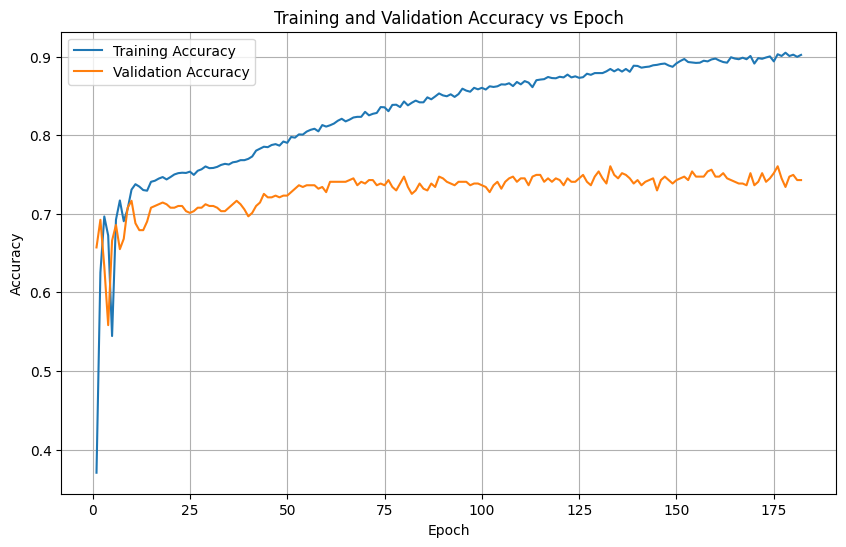

In [ ]:
import optuna
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

best_model_state = None
best_val_acc = 0
input_size = 200  # Number of input features
output_size = 3  # Number of classes
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_tensor = torch.tensor(X_train_glove, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_dev_glove, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_dev, dtype=torch.long).to(device)

def train_model(model, criterion, optimizer, X_train, y_train, X_val, y_val, num_epochs, patience):
    best_acc = 0
    patience_counter = 0
    best_model = None
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        # Calculate training accuracy
        train_pred = torch.argmax(outputs, dim=1)
        train_acc = torch.sum(train_pred == y_train).item() / train_pred.size(0)
        train_accuracies.append(train_acc)

        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val).item()

            # Calculate validation accuracy
            y_pred = torch.argmax(val_outputs, dim=1)
            val_acc = torch.sum(y_pred == y_val).item() / y_pred.size(0)
            val_accuracies.append(val_acc)

        if epoch % 50 == 0:
            print(f'Epoch {epoch+1}, Training Loss: {loss.item()}, Validation Loss: {val_loss}, Acc on dev: {val_acc}')

        if val_acc > best_acc:
            best_acc = val_acc
            best_model = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break

    if best_model is not None:
        model.load_state_dict(best_model)

    return best_acc, train_accuracies, val_accuracies

def objective(trial):
    global best_model_state, best_val_acc

    # Hyperparameter search space
    hidden_size1 = trial.suggest_int('hidden_size1', 64, 512)
    hidden_size2 = trial.suggest_int('hidden_size2', 64, 512)
    lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)
    num_epochs = trial.suggest_int('num_epochs', 10, 1000)
    patience = trial.suggest_int('patience', 10, 100)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    weight_decay = trial.suggest_float('weight_decay', 1e-5, 1e-2, log=True)
    hidden_sizes = [hidden_size1, hidden_size2]

    # Define the model, criterion, and optimizer
    model = MLP(input_size, hidden_sizes, output_size, dropout_rate).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    # Train the model with the current hyperparameters
    best_val_acc_trial, train_acc, val_acc = train_model(
        model, criterion, optimizer,
        X_train_tensor, y_train_tensor,
        X_val_tensor, y_val_tensor,
        num_epochs, patience
    )

    if best_model_state is None or best_val_acc_trial > best_val_acc:
        best_model_state = model.state_dict()
        best_val_acc = best_val_acc_trial

    return best_val_acc_trial

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)

hidden_sizes = [study.best_params['hidden_size1'], study.best_params['hidden_size2']]
lr = study.best_params['lr']
num_epochs = study.best_params['num_epochs']
patience = study.best_params['patience']
dropout_rate = study.best_params['dropout_rate']
weight_decay = study.best_params['weight_decay']
input_size = X_train_glove.shape[1]
output_size = 3

# Define and train the final model
final_model = MLP(input_size, hidden_sizes, output_size, dropout_rate).to(device)
final_criterion = nn.CrossEntropyLoss()
final_optimizer = optim.Adam(final_model.parameters(), lr=lr, weight_decay=weight_decay)
final_acc, train_accuracies, val_accuracies = train_model(
    final_model, final_criterion, final_optimizer,
    X_train_tensor, y_train_tensor,
    X_val_tensor, y_val_tensor,
    num_epochs=num_epochs, patience=patience
)

torch.save(final_model.state_dict(), 'final_model_state.pth')

# Plot accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epoch')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
final_model.load_state_dict(best_model_state)

<All keys matched successfully>

Class     Precision Recall    F1-Score  Support   
0         0.73      0.84      0.78      173       
1         0.52      0.47      0.49      77        
2         0.83      0.76      0.79      205       

accuracy  0.74
macro avg 0.69      0.69      0.69      455       
weighted avg0.74      0.74      0.74      455       


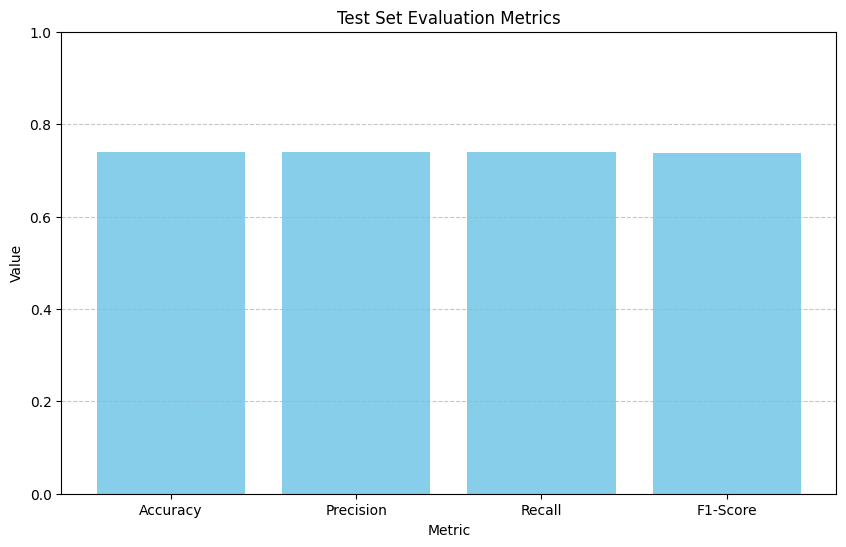

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

final_model.eval()

X_test_tensor = torch.tensor(X_test_glove, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

# Make predictions
with torch.no_grad():
    test_outputs = final_model(X_test_tensor)
    test_predictions = torch.argmax(test_outputs, dim=1).cpu().numpy()
    y_test_true = y_test_tensor.cpu().numpy()

# Calculate evaluation metrics
test_accuracy = accuracy_score(y_test_true, test_predictions)
precisions, recalls, f1s, supports = precision_recall_fscore_support(y_test_true, test_predictions)

# Calculate weighted averages
weighted_avg_precision = np.average(precisions, weights=supports)
weighted_avg_recall = np.average(recalls, weights=supports)
weighted_avg_f1 = np.average(f1s, weights=supports)

# Print the results in tabular format
print(f'{"Class":<10}{"Precision":<10}{"Recall":<10}{"F1-Score":<10}{"Support":<10}')
for i, label in enumerate(np.unique(y_test_true)):
    print(f'{label:<10}{precisions[i]:<10.2f}{recalls[i]:<10.2f}{f1s[i]:<10.2f}{supports[i]:<10}')

# Print weighted average
print(f'\n{"accuracy":<10}{test_accuracy:.2f}')
print(f'{"macro avg":<10}{np.mean(precisions):<10.2f}{np.mean(recalls):<10.2f}{np.mean(f1s):<10.2f}{np.sum(supports):<10}')
print(f'{"weighted avg":<10}{weighted_avg_precision:<10.2f}{weighted_avg_recall:<10.2f}{weighted_avg_f1:<10.2f}{np.sum(supports):<10}')

# Plotting the weighted average metrics
metrics = {
    'Accuracy': test_accuracy,
    'Precision': weighted_avg_precision,
    'Recall': weighted_avg_recall,
    'F1-Score': weighted_avg_f1
}

plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.ylim(0, 1)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Test Set Evaluation Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
